In [2]:
from astropy.io import fits
import os
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
#from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
np.seterr(divide='ignore', invalid='ignore');
plt.rcParams.update({'figure.max_open_warning': 0})
import scipy.stats as stats
import astropy.units as u
from astropy.table import Table, Column, MaskedColumn, join
from tqdm import tqdm
#from bisect import bisect_left
c = 2.998e10
k = 1.38e-16
h = 6.626e-27
plt.rcParams.update({'font.size': 15})
halpha = 6564.61
hbeta = 4862.68
hgamma = 4341.68
hdelta = 4102.89
plt.rcParams['figure.figsize'] = [7, 5]
#from IPython.display import Audio, display
#def allDone():
#    display(Audio(filename='beep.mp3', autoplay=True))
from scipy.interpolate import interp1d,InterpolatedUnivariateSpline
#import lmfit

def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx
#import emcee
import corner
#import numdifftools
from scipy.ndimage import interpolation
from scipy.signal import medfilt
from scipy.interpolate import interp1d
#from multiprocessing import Pool
#import pickle
#import h5py
#import multiprocessing
#import itertools
#from multiprocessing import sharedctypes
print('imported')
import scipy

imported


In [3]:
import pandas as pd

In [4]:
import keras.backend as K

Using TensorFlow backend.


In [5]:
import tensorflow as tf

In [498]:
from keras.models import Sequential,Model
from keras.layers import Dense,Input
from keras.optimizers import Adam,Adamax
#from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize,scale,MinMaxScaler,StandardScaler

In [7]:
## Enter parameter:
searchparameter = '_'

prefilenames = os.listdir('koester2/')
filenames = []
for i in range(len(prefilenames)):
    if searchparameter in prefilenames[i]:
        filenames.append(prefilenames[i])
        
len(filenames)

1040

In [8]:
modelspectra = [];
modelwl = [];
loggs = [];
teffs = [];
for i in tqdm(filenames):
    specname=i
    f = open('koester2/'+specname)
    data = f.readlines()
    f.close()
    headerdata = data[0:7]
    spectraldata = data[6:]
    lam = []
    flux = []

    for i in range(len(spectraldata)):
        l=float(spectraldata[i].split()[0])
        lam.append(l)
        f = float(spectraldata[i].split()[1])
        flux.append(f)

    lam = np.asarray(lam)
    flux = np.asarray(flux) / 1e7

    teff = float(headerdata[1].split()[3])
    logg = float(headerdata[2].split()[3])
    
    in1 = find_nearest(lam,4000)
    in2 = find_nearest(lam,8000)

    flux = flux[in1:in2]
    lam = lam[in1:in2]
    
    flux = flux[:-1][~ (np.diff(lam) == 0)]
    lam = lam[:-1][~ (np.diff(lam) == 0)]
    
    lamgrid = np.arange(4000,8000)
    
    func = interp1d(lam,flux,kind='linear',assume_sorted = False,fill_value='extrapolate')
    flux = func(lamgrid)
    
    modelspectra.append(flux)
    modelwl.append(lam)
    teffs.append(teff)
    loggs.append(logg)

modelspectra = np.asarray(modelspectra)
loggs = np.asarray(loggs)
teffs = np.asarray(teffs)

100%|██████████| 1040/1040 [00:19<00:00, 54.46it/s]


In [204]:
X = np.stack((teffs,loggs)).transpose()
t = np.log(modelspectra)

sc = MinMaxScaler()
msc = StandardScaler()

X_scaled = sc.fit_transform(X)
t_scaled = msc.fit_transform(t)

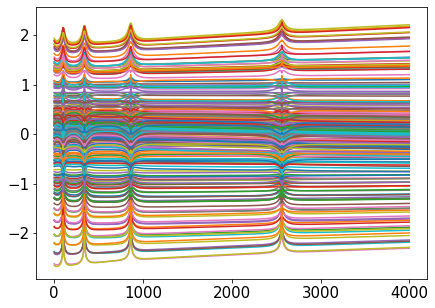

In [206]:
plt.plot(t_scaled[0:205].T)

In [175]:
def v_mse(y_true,y_pred):
    z
    return K.mean(res)

In [499]:
H = 25
def generator():
    x = Input(shape=(X[0].shape[0],))
    y = Dense(H,activation='sigmoid')(x)
    y = Dense(H,activation='sigmoid')(y)
    y = Dense(H,activation='sigmoid')(y)
    y = Dense(H,activation='sigmoid')(y)
    out = Dense(4000,activation='linear')(y)
    
    model = Model(inputs = x, outputs = out)
    model.compile(optimizer = Adamax(), loss = 'mse', \
                  metrics = ['mae'])
    return model
model = generator()
history = [];
model.load_weights('model_interp.h5')
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_27 (InputLayer)        (None, 2)                 0         
_________________________________________________________________
dense_121 (Dense)            (None, 25)                75        
_________________________________________________________________
dense_122 (Dense)            (None, 25)                650       
_________________________________________________________________
dense_123 (Dense)            (None, 25)                650       
_________________________________________________________________
dense_124 (Dense)            (None, 25)                650       
_________________________________________________________________
dense_125 (Dense)            (None, 4000)              104000    
Total params: 106,025
Trainable params: 106,025
Non-trainable params: 0
_________________________________________________________________
None

In [ ]:
for i in tqdm(range(1000)): 
    print('Training meta-batch %i'%i)
    
    n_epochs = 100
    batch = 32
    
    h = model.fit(X_scaled,t_scaled, epochs = n_epochs, verbose = 0, batch_size = batch, shuffle = True)
    history = np.append(history, h.history['loss'])
    model.save_weights('model_interp.h5')





























  0%|          | 0/1000 [00:00<?, ?it/s]

Training meta-batch 0






























  0%|          | 1/1000 [00:15<4:11:05, 15.08s/it]

Training meta-batch 1






























  0%|          | 2/1000 [00:37<4:48:22, 17.34s/it]

Training meta-batch 2






























  0%|          | 3/1000 [01:00<5:16:35, 19.05s/it]

Training meta-batch 3






























  0%|          | 4/1000 [01:23<5:33:09, 20.07s/it]

Training meta-batch 4






























  0%|          | 5/1000 [01:45<5:44:42, 20.79s/it]

Training meta-batch 5






























  1%|          | 6/1000 [02:08<5:52:29, 21.28s/it]

Training meta-batch 6






























  1%|          | 7/1000 [02:30<5:58:59, 21.69s/it]

Training meta-batch 7






























  1%|          | 8/1000 [02:53<6:03:39, 22.00s/it]

Training meta-batch 8






























  1%|          | 9/1000 [03:16<6:06:30, 22.19s/it]

Training meta-batch 9






























  1%|          | 10/1000 [03:38<6:07:23, 22.27s/it]

Training meta-batch 10






























  1%|          | 11/1000 [04:00<6:07:52, 22.32s/it]

Training meta-batch 11






























  1%|          | 12/1000 [04:23<6:08:31, 22.38s/it]

Training meta-batch 12






























  1%|▏         | 13/1000 [04:46<6:08:53, 22.43s/it]

Training meta-batch 13






























  1%|▏         | 14/1000 [05:08<6:10:17, 22.53s/it]

Training meta-batch 14






























  2%|▏         | 15/1000 [05:31<6:09:45, 22.52s/it]

Training meta-batch 15






























  2%|▏         | 16/1000 [05:53<6:09:17, 22.52s/it]

Training meta-batch 16






























  2%|▏         | 17/1000 [06:16<6:08:40, 22.50s/it]

Training meta-batch 17






























  2%|▏         | 18/1000 [06:38<6:08:50, 22.54s/it]

Training meta-batch 18






























  2%|▏         | 19/1000 [07:01<6:07:18, 22.47s/it]

Training meta-batch 19






























  2%|▏         | 20/1000 [07:24<6:08:40, 22.57s/it]

Training meta-batch 20






























  2%|▏         | 21/1000 [07:46<6:06:31, 22.46s/it]

Training meta-batch 21






























  2%|▏         | 22/1000 [08:08<6:07:10, 22.53s/it]

Training meta-batch 22






























  2%|▏         | 23/1000 [08:31<6:06:25, 22.50s/it]

Training meta-batch 23






























  2%|▏         | 24/1000 [08:53<6:05:20, 22.46s/it]

Training meta-batch 24






























  2%|▎         | 25/1000 [09:15<6:04:11, 22.41s/it]

Training meta-batch 25






























  3%|▎         | 26/1000 [09:38<6:06:16, 22.56s/it]

Training meta-batch 26






























  3%|▎         | 27/1000 [10:01<6:06:30, 22.60s/it]

Training meta-batch 27






























  3%|▎         | 28/1000 [10:24<6:08:01, 22.72s/it]

Training meta-batch 28






























  3%|▎         | 29/1000 [10:47<6:07:41, 22.72s/it]

Training meta-batch 29






























  3%|▎         | 30/1000 [11:10<6:07:26, 22.73s/it]

Training meta-batch 30






























  3%|▎         | 31/1000 [11:32<6:06:32, 22.70s/it]

Training meta-batch 31






























  3%|▎         | 32/1000 [11:54<6:03:59, 22.56s/it]

Training meta-batch 32






























  3%|▎         | 33/1000 [12:17<6:04:53, 22.64s/it]

Training meta-batch 33






























  3%|▎         | 34/1000 [12:40<6:04:28, 22.64s/it]

Training meta-batch 34






























  4%|▎         | 35/1000 [13:02<6:02:12, 22.52s/it]

Training meta-batch 35






























  4%|▎         | 36/1000 [13:25<6:01:30, 22.50s/it]

Training meta-batch 36






























  4%|▎         | 37/1000 [13:47<6:00:08, 22.44s/it]

Training meta-batch 37






























  4%|▍         | 38/1000 [14:09<6:00:29, 22.48s/it]

Training meta-batch 38






























  4%|▍         | 39/1000 [14:32<6:01:33, 22.57s/it]

Training meta-batch 39






























  4%|▍         | 40/1000 [14:55<6:01:40, 22.60s/it]

Training meta-batch 40






























  4%|▍         | 41/1000 [15:17<6:00:00, 22.52s/it]

Training meta-batch 41






























  4%|▍         | 42/1000 [15:40<5:59:28, 22.51s/it]

Training meta-batch 42






























  4%|▍         | 43/1000 [16:03<6:00:26, 22.60s/it]

Training meta-batch 43






























  4%|▍         | 44/1000 [16:25<6:00:48, 22.65s/it]

Training meta-batch 44






























  4%|▍         | 45/1000 [16:48<6:01:39, 22.72s/it]

Training meta-batch 45






























  5%|▍         | 46/1000 [17:11<6:01:17, 22.72s/it]

Training meta-batch 46






























  5%|▍         | 47/1000 [17:33<6:00:09, 22.67s/it]

Training meta-batch 47






























  5%|▍         | 48/1000 [17:56<5:59:33, 22.66s/it]

Training meta-batch 48






























  5%|▍         | 49/1000 [18:19<5:58:56, 22.65s/it]

Training meta-batch 49






























  5%|▌         | 50/1000 [18:41<5:58:51, 22.66s/it]

Training meta-batch 50






























  5%|▌         | 51/1000 [19:04<5:59:00, 22.70s/it]

Training meta-batch 51






























  5%|▌         | 52/1000 [19:27<5:59:26, 22.75s/it]

Training meta-batch 52






























  5%|▌         | 53/1000 [19:50<5:58:49, 22.73s/it]

Training meta-batch 53






























  5%|▌         | 54/1000 [20:12<5:56:36, 22.62s/it]

Training meta-batch 54






























  6%|▌         | 55/1000 [20:35<5:57:57, 22.73s/it]

Training meta-batch 55






























  6%|▌         | 56/1000 [20:58<5:57:11, 22.70s/it]

Training meta-batch 56






























  6%|▌         | 57/1000 [21:20<5:56:08, 22.66s/it]

Training meta-batch 57






























  6%|▌         | 58/1000 [21:43<5:56:31, 22.71s/it]

Training meta-batch 58






























  6%|▌         | 59/1000 [22:06<5:56:03, 22.70s/it]

Training meta-batch 59






























  6%|▌         | 60/1000 [22:28<5:55:25, 22.69s/it]

Training meta-batch 60






























  6%|▌         | 61/1000 [22:51<5:54:34, 22.66s/it]

Training meta-batch 61






























  6%|▌         | 62/1000 [23:14<5:55:17, 22.73s/it]

Training meta-batch 62






























  6%|▋         | 63/1000 [23:37<5:54:08, 22.68s/it]

Training meta-batch 63






























  6%|▋         | 64/1000 [23:59<5:54:54, 22.75s/it]

Training meta-batch 64






























  6%|▋         | 65/1000 [24:22<5:53:43, 22.70s/it]

Training meta-batch 65






























  7%|▋         | 66/1000 [24:45<5:52:43, 22.66s/it]

Training meta-batch 66






























  7%|▋         | 67/1000 [25:07<5:52:44, 22.68s/it]

Training meta-batch 67






























  7%|▋         | 68/1000 [25:30<5:51:37, 22.64s/it]

Training meta-batch 68






























  7%|▋         | 69/1000 [25:53<5:52:18, 22.71s/it]

Training meta-batch 69






























  7%|▋         | 70/1000 [26:15<5:50:43, 22.63s/it]

Training meta-batch 70






























  7%|▋         | 71/1000 [26:38<5:51:38, 22.71s/it]

Training meta-batch 71






























  7%|▋         | 72/1000 [27:03<6:00:36, 23.31s/it]

Training meta-batch 72






























  7%|▋         | 73/1000 [27:26<5:59:07, 23.24s/it]

Training meta-batch 73






























  7%|▋         | 74/1000 [27:49<5:56:22, 23.09s/it]

Training meta-batch 74






























  8%|▊         | 75/1000 [28:11<5:53:11, 22.91s/it]

Training meta-batch 75






























  8%|▊         | 76/1000 [28:34<5:51:55, 22.85s/it]

Training meta-batch 76






























  8%|▊         | 77/1000 [28:56<5:49:38, 22.73s/it]

Training meta-batch 77






























  8%|▊         | 78/1000 [29:19<5:48:08, 22.66s/it]

Training meta-batch 78






























  8%|▊         | 79/1000 [29:41<5:47:34, 22.64s/it]

Training meta-batch 79






























  8%|▊         | 80/1000 [30:04<5:46:36, 22.60s/it]

Training meta-batch 80






























  8%|▊         | 81/1000 [30:26<5:45:49, 22.58s/it]

Training meta-batch 81






























  8%|▊         | 82/1000 [30:49<5:46:00, 22.62s/it]

Training meta-batch 82






























  8%|▊         | 83/1000 [31:12<5:45:33, 22.61s/it]

Training meta-batch 83






























  8%|▊         | 84/1000 [31:34<5:45:12, 22.61s/it]

Training meta-batch 84






























  8%|▊         | 85/1000 [31:57<5:43:20, 22.51s/it]

Training meta-batch 85






























  9%|▊         | 86/1000 [32:19<5:44:15, 22.60s/it]

Training meta-batch 86






























  9%|▊         | 87/1000 [32:42<5:44:15, 22.62s/it]

Training meta-batch 87






























  9%|▉         | 88/1000 [33:05<5:44:52, 22.69s/it]

Training meta-batch 88






























  9%|▉         | 89/1000 [33:28<5:44:02, 22.66s/it]

Training meta-batch 89






























  9%|▉         | 90/1000 [33:50<5:43:49, 22.67s/it]

Training meta-batch 90






























  9%|▉         | 91/1000 [34:13<5:44:00, 22.71s/it]

Training meta-batch 91






























  9%|▉         | 92/1000 [34:35<5:42:21, 22.62s/it]

Training meta-batch 92






























  9%|▉         | 93/1000 [34:58<5:41:39, 22.60s/it]

Training meta-batch 93






























  9%|▉         | 94/1000 [35:21<5:41:42, 22.63s/it]

Training meta-batch 94






























 10%|▉         | 95/1000 [35:43<5:41:28, 22.64s/it]

Training meta-batch 95






























 10%|▉         | 96/1000 [36:06<5:39:33, 22.54s/it]

Training meta-batch 96






























 10%|▉         | 97/1000 [36:28<5:38:08, 22.47s/it]

Training meta-batch 97






























 10%|▉         | 98/1000 [36:50<5:37:56, 22.48s/it]

Training meta-batch 98






























 10%|▉         | 99/1000 [37:13<5:37:18, 22.46s/it]

Training meta-batch 99






























 10%|█         | 100/1000 [37:36<5:38:49, 22.59s/it]

Training meta-batch 100






























 10%|█         | 101/1000 [37:59<5:39:48, 22.68s/it]

Training meta-batch 101






























 10%|█         | 102/1000 [38:21<5:38:34, 22.62s/it]

Training meta-batch 102






























 10%|█         | 103/1000 [38:44<5:38:27, 22.64s/it]

Training meta-batch 103






























 10%|█         | 104/1000 [39:06<5:37:59, 22.63s/it]

Training meta-batch 104






























 10%|█         | 105/1000 [39:29<5:36:26, 22.55s/it]

Training meta-batch 105


30.052 percent improvement


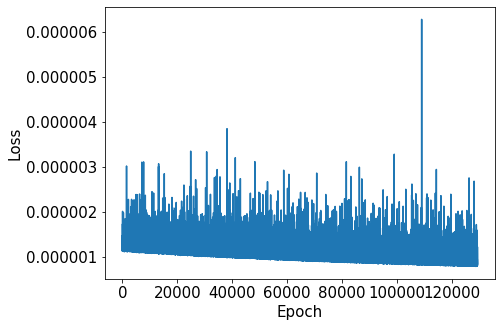

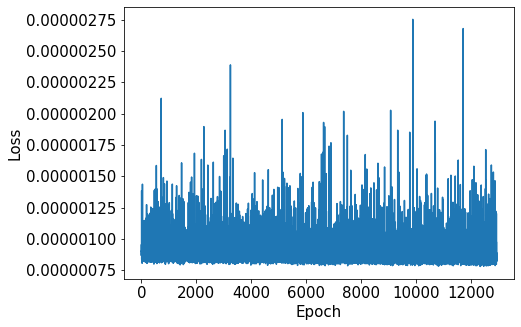

In [486]:
plt.figure()
plt.plot(history);
plt.xlabel('Epoch')
plt.ylabel('Loss')

r = int(len(history)/10)
plt.figure()
plt.plot(history[-r:]);
plt.xlabel('Epoch')
plt.ylabel('Loss')
print('%.3f percent improvement'%(100*(history[0] - history[-1])/history[0]))

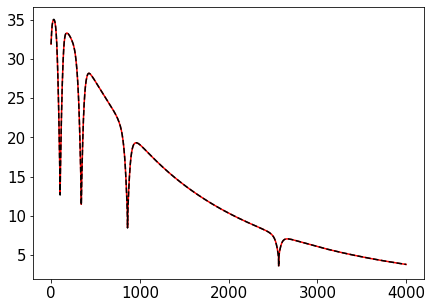

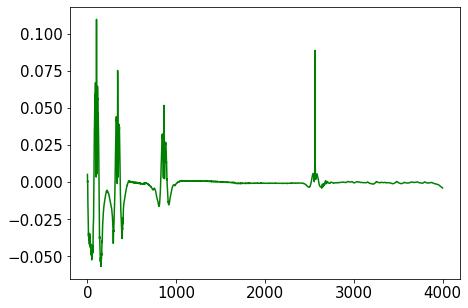

In [490]:
n = np.random.randint(0,len(X))
label = X_scaled[n].reshape(1,-1)
true = np.exp(t[n])
pred = np.exp(msc.inverse_transform(model.predict(label)))[0,:]
plt.plot(true,'k--',zorder=8)
plt.plot(pred,'r-')
plt.figure()
plt.plot(pred-true,'g-')

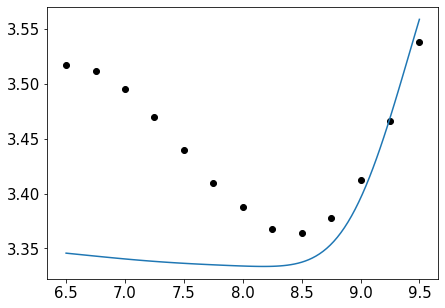

In [494]:
pixel = 2563
temp = 15000


ts = teffs[teffs == temp]
ls = loggs[teffs == temp]
labels = np.stack((ts,ls)).T
tflux = np.exp(t)[teffs == temp][:,pixel]

plt.scatter(ls,tflux,color='k')

linls = np.linspace(min(ls),max(ls),100)
lints = np.repeat(temp,100)
linlabels = np.stack((lints,linls)).T
lintflux = np.exp(msc.inverse_transform(model.predict(sc.transform(linlabels))))[:,pixel]
plt.plot(linls,lintflux)

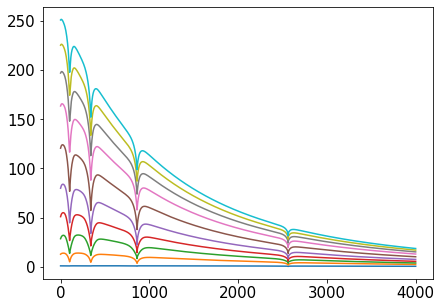

In [459]:
n = 10
ls = np.linspace(8,8,n)
ts = np.linspace(6000,50000,n)
labels = np.stack((ts,ls)).T
preds = np.exp(msc.inverse_transform(model.predict(sc.transform(labels))))
for i in preds:
    plt.plot(i)

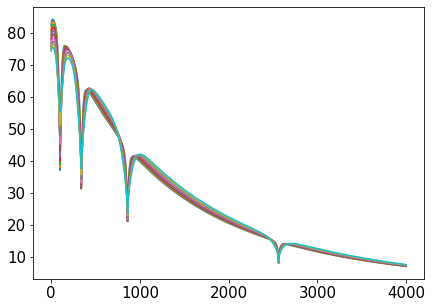

In [432]:
n = 10
ls = np.linspace(6.5,9.5,n)
ts = np.linspace(25000,25000,n)
labels = np.stack((ts,ls)).T
preds = np.exp(msc.inverse_transform(model.predict(sc.transform(labels))))
for i in preds:
    plt.plot(i)

In [460]:
def ch_cont(array):
    spec = array
    lamgrid = np.linspace(4000,8000,4000)
    p = np.polynomial.chebyshev.chebfit(lamgrid,spec,4)
    contcorr = spec / np.polynomial.chebyshev.chebval(lamgrid,p)
    plt.plot(contcorr)
    return contcorr

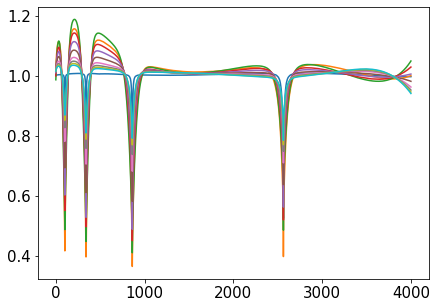

In [461]:
cpreds = [];
diffs = np.repeat(0,4000)
for i in range(len(preds)):
    cpreds.append(ch_cont(preds[i]))
cpreds = np.asarray(cpreds)

In [470]:
contbool = (np.ptp(cpreds,0) < 0.04)

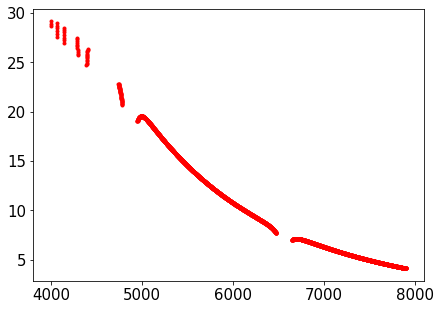

In [479]:
plt.plot(lamgrid[contbool],preds[2][contbool],'r.')